## Problem3 (3)

In [63]:
import numpy as np
import matplotlib.pyplot as plt

#データセット2
def dataset2(n=40):
    omega = np.random.randn()
    noise = 0.8 * np.random.randn(n)
    x = np.random.randn(n, 2) + 0
    y = 2 * (omega * x[:,0] + x[:,1] > 0) - 1
    return x,y

#ヒンジ損失を正則化の和 式(1)の中身
def hinge_loss_and_regularization(x, y, w, l):
    loss = 0.0
    for i in range(len(x)):
        loss += max([0.0, 1.0 - y[i] * w.dot(x[i])])
    loss += l * w.dot(w)
    return loss

#ラグランジュ双対関数 式(2) 最小化問題に変換してあることに注意
def dual_lagrange(alpha, K, l):
    eval = alpha.T.dot(K).dot(alpha) / (4.0 * l)
    return eval - np.sum(alpha)

#各変数初期化
data_size = 40
x, y = dataset2(n=data_size)
alpha = np.zeros(data_size)
eta = 0.01
l = 8
K = np.zeros((data_size, data_size))
for i in range(data_size):
    for j in range(data_size):
        K[i][j] = y[i] * y[j] * x[i].dot(x[j])
iteration = 500
evaluations_hinge_loss_and_regularization = np.zeros(iteration)
evaluations_dual_lagrange = np.zeros(iteration)

#最適化
for i in range(iteration):
    w = np.zeros(2)
    for j in range(data_size):
        w += alpha[j] * y[j] * x[j]
    w /= 2.0 * l
    #現在の評価値を記録
    evaluations_hinge_loss_and_regularization[i] = hinge_loss_and_regularization(x,y,w,l)
    evaluations_dual_lagrange[i] = dual_lagrange(alpha,K,l)
    #alphaの更新
    tmp = K.dot(alpha) / (2.0 * l) - 1.0
    alpha -= eta * tmp
    alpha[alpha < 0] = 0
    alpha[alpha > 1] = 1

print("Finish!!")

Finish!!


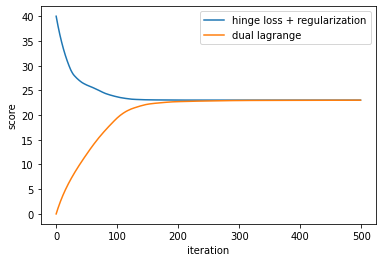

In [64]:
#プロット
plt.plot(evaluations_hinge_loss_and_regularization, label="hinge loss + regularization")
plt.plot(np.abs(evaluations_dual_lagrange), label="dual lagrange")
plt.xlabel("iteration")
plt.ylabel("score")
plt.legend()
plt.savefig("Problem3-3.png")